#BEHAVIORAL SEGMENTATION

Behavioral segmentation divides consumers according to behavior patterns as they interact with a company. As the name suggests, this category of segmentation studies the behavioral traits of consumers — their knowledge of, attitude towards, use of, likes/dislikes of, or response to a product, service, promotion, or brand.


#IMPORTANCE
*   Identifies the most engaged users
*   Allows marketers to optimize their positioning and marketing messages toward the customer data at hand
*   Provides refined personalized experiences

# segments for grouping customers by:
*   Purchase behavior & tendencies.
*   Occasion and timing
*   Benefits sought
*   Customer loyalty



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import datetime as dt
from operator import attrgetter
from sklearn.cluster import KMeans
import warnings
import os
# importing DateTime module to convert extracted dates
import datetime as dt

In [ ]:
db_name = "Processed_Thrifty_Database"
host = "capstone-cosmos-db.mongo.cosmos.azure.com"
port = 10255
username = "capstone-cosmos-db"
password = "BuYmUjcc9LwFDN2PdVNuUudZTG5ABlxPoZgdIoRlrugcfiF5Rm15REQOJL1dspgH28NeeJI5dOeMCwzqRRrCvg=="
args = "ssl=true&retrywrites=false&ssl_cert_reqs=CERT_NONE"

In [ ]:
connection_uri = f"mongodb://{username}:{password}@{host}:{port}/{db_name}?{args}"
client = MongoClient(connection_uri)
 
db = client[db_name]
collection = db['Customer_Segmentation']

In [ ]:
data= pd.DataFrame(list(collection.find()))
data.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0


In [ ]:
df=data.drop(['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Latitude','Longitude','_id','Birthdate','Dt_Customer'], axis=1)
df.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0


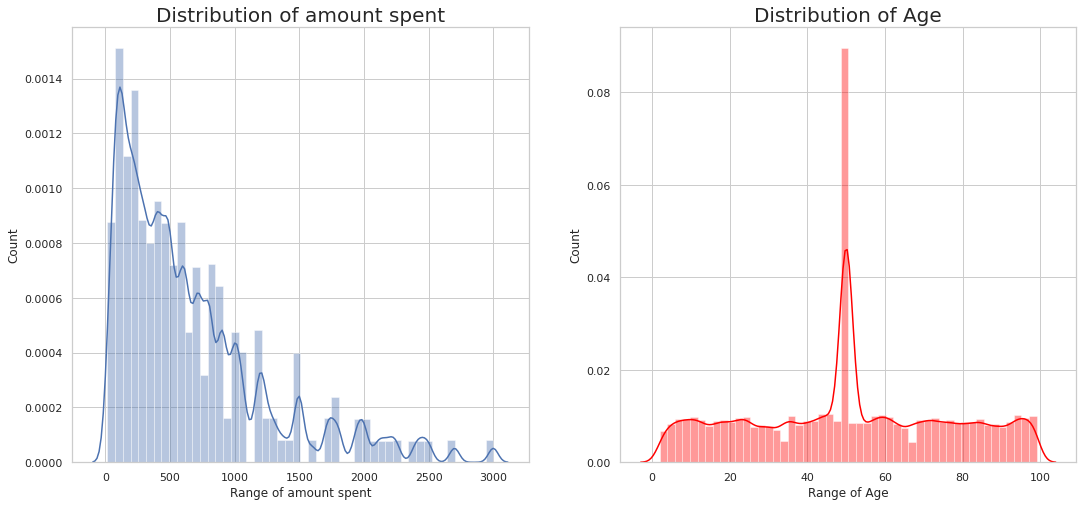

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Amount_Spent'])
plt.title('Distribution of amount spent', fontsize = 20)
plt.xlabel('Range of amount spent')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Transaction_Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

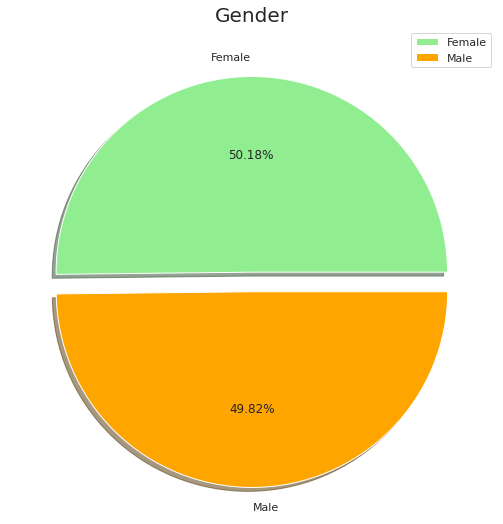

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

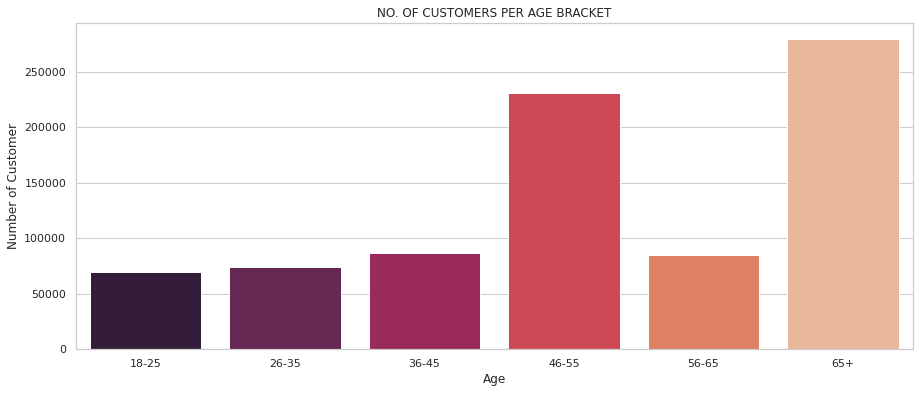

In [ ]:
# check the distribution of number of customers in each age group

age18_25 = df.Transaction_Age[(data.Transaction_Age <= 25) & (df.Transaction_Age >= 18)]
age26_35 = df.Transaction_Age[(data.Transaction_Age <= 35) & (df.Transaction_Age >= 26)]
age36_45 = df.Transaction_Age[(data.Transaction_Age <= 45) & (df.Transaction_Age >= 36)]
age46_55 = df.Transaction_Age[(data.Transaction_Age <= 55) & (df.Transaction_Age>= 46)]
age56_65 = df.Transaction_Age[(data.Transaction_Age <= 65) & (df.Transaction_Age>= 56)]
age65above = df.Transaction_Age[data.Transaction_Age >= 66]

x = ["18-25","26-35","36-45","46-55","56-65","65+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age65above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("NO. OF CUSTOMERS PER AGE BRACKET")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

#Modelling - RFM Modelling

In order to do Customer Segmentation, the RFM modelling technique will be used.
RFM is the way to understand your customer 's behaviour

RFM stands for Recency - Frequency - Monetary Value with the following definitions:


*   RECENCY (R): Time since last purchase
*   FREQUENCY (F): Total number of purchases
*   MONETARY VALUE (M): Total monetary value

#Benefits of RFM Analysis

*   Increased customer retention
*   Increased response rate
*   Increased conversion rate
*   Increased revenue

#RFM Analysis answers the following questions:
*   Who are our best customers?
*   Who has the potential to be converted into more profitable customers?
*   Which customers do we need to retain?
*   Which group of customers is most likely to respond to our marketing campaign?




#Based on the values above, one could construct various segments that classify the customers to:

#Low value Segment
R- Less active
F - Not very frequent
M - Low spend

#Mid value Segment
R - Medium or inconsistent activity
F - infrequent or frequent at specific times
M - varied spending but overall in the mid of the scale

#High value Segment
R - Very active
F - Very frequent
M - Great spending profile








#Recency Score

In [ ]:
# Generate new dataframe based on unique Customerid to keep track of RFM scores
customer = pd.DataFrame(df['Customer_Id'].unique())
customer.columns = ['Customer_Id']

In [ ]:
# Generate new data frame based on latest transaction date per Customer (groupby = Customerid)
recency = df.groupby('Customer_Id').  Transaction_Date.max().reset_index()
recency.columns = ['Customer_Id','LastPurchaseDate']
# Set observation point as the last transaction date in the dataset
LasttransactionDate = recency['LastPurchaseDate'].max()
# Generate Recency in days by subtracting the Last Purchase date for each customer from the Last transaction Date
recency['Recency'] = (LasttransactionDate - recency['LastPurchaseDate']).dt.days

In [ ]:
# Consolidate to customer DataFrame
customer = pd.merge(customer, recency[['Customer_Id','Recency']], on='Customer_Id')
customer

,Customer_Id,Recency
0,1680,8
1,1400,2
2,1681,3
3,1401,0
4,1402,1
...,...,...
2235,485,0
2236,486,0
2237,487,0
2238,488,2


In [ ]:
#code testing my recency and frequency
#(Timestamp('2018-01-01 00:02:24'), Timestamp('2020-12-30 23:55:48'))
#trend=df[df.Customer_Id == 1402]
#trend
#df['Transaction_Date'].min(),df['Transaction_Date'].max()

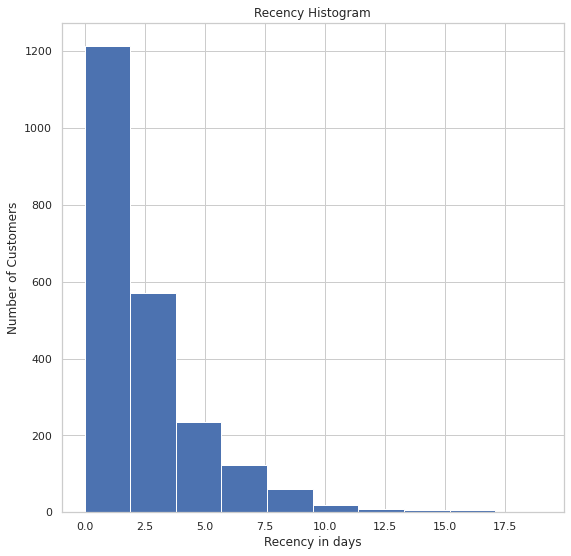

In [ ]:
# Plot Recency
customer.Recency.plot.hist();
plt.xlabel("Recency in days")
plt.ylabel("Number of Customers")
plt.title("Recency Histogram");

# Frequency Score

In [ ]:
# Count number of transaction per Customerid 
frequency = df.groupby('Customer_Id').Transaction_Date.count().reset_index()
frequency.columns = ['Customer_Id','Frequency']

# Consolidate Frequency to existing Customer DataFrame
customer = pd.merge(customer, frequency, on='Customer_Id')
customer.head()

,Customer_Id,Recency,Frequency
0,1680,8,446
1,1400,2,438
2,1681,3,469
3,1401,0,413
4,1402,1,410


In [ ]:
#Review statistics 
customer.describe()

,Customer_Id,Recency,Frequency
count,2240.000000,2240.000000,2240.000000
mean,1119.500000,2.083929,425.898214
std,646.776623,2.517489,19.922660
min,0.000000,0.000000,366.000000
25%,559.750000,0.000000,412.750000
50%,1119.500000,1.000000,426.000000
75%,1679.250000,3.000000,439.000000
max,2239.000000,19.000000,491.000000


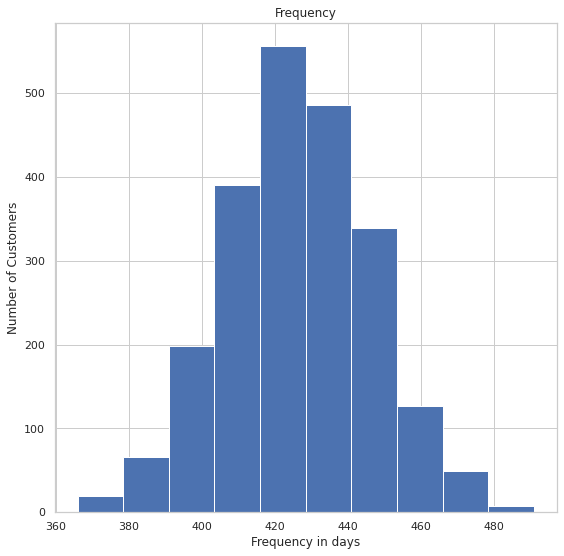

In [ ]:
# Plot Frequency
# In order to plot effectively and not have a skewed diagram, we've sorted the frequencies
customer.Frequency.sort_values().head(2240).plot.hist();
plt.xlabel("Frequency in days")
plt.ylabel("Number of Customers")
plt.title("Frequency");

#Monetary Value Score (Revenue)

In [ ]:
# Grouping revenue per Customer ID
revenue = df.groupby('Customer_Id').Amount_Spent.sum().reset_index().rename(columns = {'Amount_Spent': 'Monetary'}, inplace = False)

# Consolidate Revenue to existing Customer DataFrame
customer = pd.merge(customer, revenue, on='Customer_Id')
customer.head()

,Customer_Id,Recency,Frequency,Monetary
0,1680,8,446,286070
1,1400,2,438,292155
2,1681,3,469,332985
3,1401,0,413,297260
4,1402,1,410,278135


In [ ]:
customer.describe()

,Customer_Id,Recency,Frequency,Monetary
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,2.083929,425.898214,282197.656250
std,646.776623,2.517489,19.922660,18313.471125
min,0.000000,0.000000,366.000000,226805.000000
25%,559.750000,0.000000,412.750000,269646.250000
50%,1119.500000,1.000000,426.000000,281530.000000
75%,1679.250000,3.000000,439.000000,294323.750000
max,2239.000000,19.000000,491.000000,349085.000000


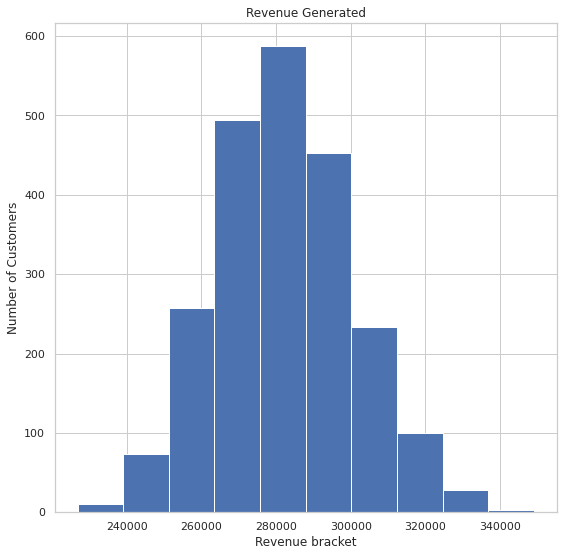

In [ ]:
# Plot Revenue
customer.Monetary.sort_values().head(2240).plot.hist();
plt.xlabel("Revenue bracket")
plt.ylabel("Number of Customers")
plt.title("Revenue Generated");

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


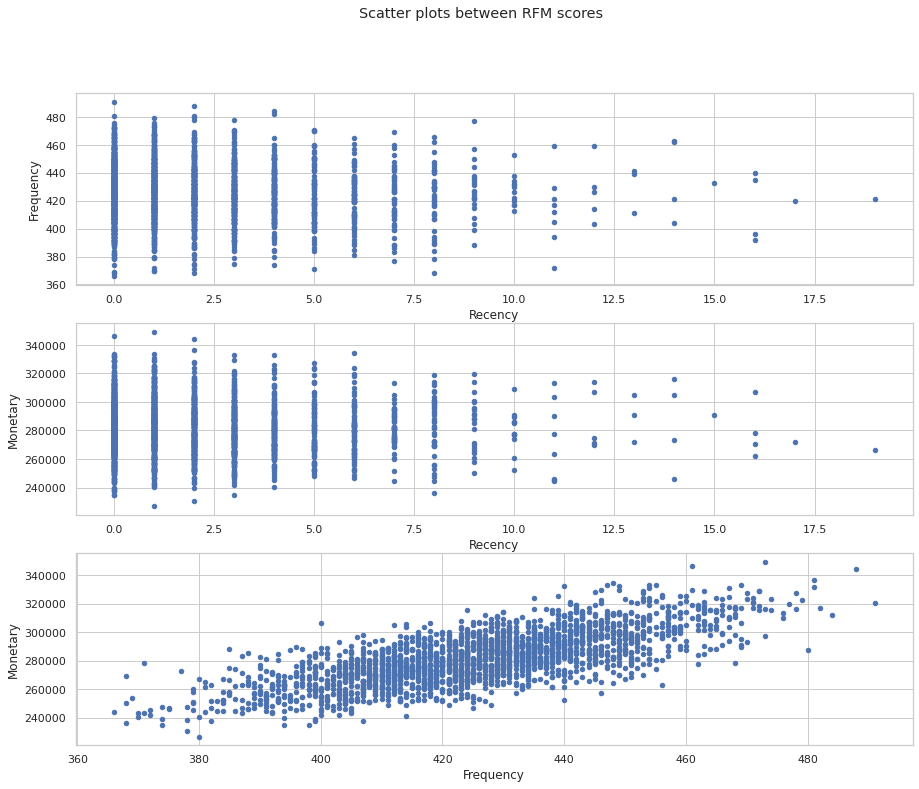

In [ ]:
# scatter plots between the different scores
fig, (xa1, xb2, xc3) = plt.subplots(3)
fig.suptitle('Scatter plots between RFM scores')
customer.plot.scatter(x = 'Recency', y = 'Frequency', ax = xa1, figsize = (15,12));
customer.plot.scatter(x = 'Recency', y = 'Monetary', ax = xb2);
customer.plot.scatter(x = 'Frequency', y = 'Monetary', ax = xc3);

. Creating the RFM Segmentation Table

In [ ]:
def recency_quarter(x):

    recency_quantile = customer["Recency"].quantile([0.25, 0.50, 0.75]).values 
    if x <= recency_quantile[0]:
        return 4
    elif x <= recency_quantile[1]:
        return 3
    elif x <= recency_quantile[2]:
        return 2
    else:
        return 1

In [ ]:
def frequency_quarter(x):
    
    frequency_quantile = customer["Frequency"].quantile([0.25, 0.50, 0.75]).values 
    if x <= frequency_quantile[0]:
        return 1
    elif x <= frequency_quantile[1]:
        return 2
    elif x <= frequency_quantile[2]:
        return 3
    else:
        return 4


In [ ]:
def monetary_quarter(x):
    
    monetary_quantile = customer["Monetary"].quantile([0.25, 0.50, 0.75]).values 
    if x <= monetary_quantile[0]:
        return 1
    elif x <= monetary_quantile[1]:
        return 2
    elif x <= monetary_quantile[2]:
        return 3
    else:
        return 4

In [ ]:
#Scoring customers from 1 - 4 with functions
customer["RecencyScore"] = customer["Recency"].apply(recency_quarter)
customer["FrequencyScore"] = customer["Frequency"].apply(frequency_quarter)
customer["MonetaryScore"] = customer["Monetary"].apply(monetary_quarter)

customer.head()

,Customer_Id,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,1680,8,446,286070,1,4,3
1,1400,2,438,292155,2,3,3
2,1681,3,469,332985,2,4,4
3,1401,0,413,297260,4,2,4
4,1402,1,410,278135,3,1,2


In [ ]:
customer["CombinedScore"] = customer["RecencyScore"].astype("str") + customer["FrequencyScore"].astype("str") + customer["MonetaryScore"].astype("str")
customer["CombinedScore"] = customer["CombinedScore"].astype("int")
print("Combined Score unique values:", customer["CombinedScore"].nunique())
customer["CombinedScore"].head()

Combined Score unique values: 63


0    143
1    233
2    244
3    424
4    312
Name: CombinedScore, dtype: int64

In [ ]:
customer["CombinedScoreTotal"] = customer["RecencyScore"] + customer["FrequencyScore"] + customer["MonetaryScore"]
customer["CombinedScoreTotal"] = customer["CombinedScoreTotal"].astype("int")
print("Combined Score Total unique values:", customer["CombinedScoreTotal"].nunique())
customer["CombinedScoreTotal"].head()

Combined Score Total unique values: 10


0     8
1     8
2    10
3    10
4     6
Name: CombinedScoreTotal, dtype: int64

In [ ]:
customer["CombinedScoreTotal"].value_counts()

7     342
8     303
6     295
9     270
10    267
5     213
11    174
4     166
12    130
3      80
Name: CombinedScoreTotal, dtype: int64

In [ ]:
customer.head()

,Customer_Id,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,CombinedScore,CombinedScoreTotal
0,1680,8,446,286070,1,4,3,143,8
1,1400,2,438,292155,2,3,3,233,8
2,1681,3,469,332985,2,4,4,244,10
3,1401,0,413,297260,4,2,4,424,10
4,1402,1,410,278135,3,1,2,312,6


In [ ]:
# Count num of unique segments
rfm_count_unique = customer.groupby('CombinedScore')['CombinedScore'].nunique()
print(rfm_count_unique.sum())

63


In [ ]:
def rfm_labels(x):
    if x <= 4:
        return "Risk of churn"
    elif x <= 6:
        return "Low Spenders"
    elif x <= 8:
        return "Mid Spenders"
    else:
        return "High spenders"


In [ ]:
def rfm_labels(x):
    if x <= 4:
        return "Risk of churn"
    elif x <= 6:
        return "Low Spenders"
    elif x <= 8:
        return "Mid Spenders"
    else:
        return "High spenders"


In [ ]:
customer["levels"] = customer["CombinedScoreTotal"].apply(rfm_labels)
customer.head()

,Customer_Id,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,CombinedScore,CombinedScoreTotal,levels
0,1680,8,446,286070,1,4,3,143,8,Mid Spenders
1,1400,2,438,292155,2,3,3,233,8,Mid Spenders
2,1681,3,469,332985,2,4,4,244,10,High spenders
3,1401,0,413,297260,4,2,4,424,10,High spenders
4,1402,1,410,278135,3,1,2,312,6,Low Spenders


In [ ]:
customer.groupby("levels")["CombinedScoreTotal"].mean() # Average Combined Score of each segment

levels
High spenders    10.195006
Low Spenders      5.580709
Mid Spenders      7.469767
Risk of churn     3.674797
Name: CombinedScoreTotal, dtype: float64

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = customer.groupby('levels').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)


              Recency Frequency  Monetary      
                 mean      mean      mean count
levels                                         
High spenders     1.1     443.3  298070.2   841
Low Spenders      2.4     410.8  267865.5   508
Mid Spenders      2.0     424.1  280852.8   645
Risk of churn     4.7     402.3  261056.9   246


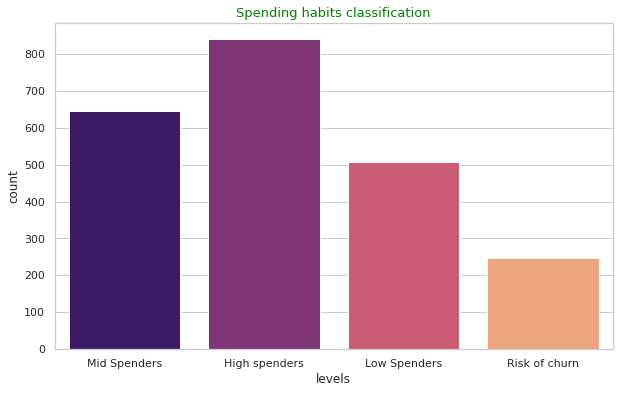

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Spending habits classification", c="green", size=13)
sns.countplot(customer["levels"], palette="magma");